### Aim of the Study
##### Find the drivig factors/ variables behind loan default. i.e find out variables tha are strong indicators of a default. 

###### Major parts that need to be done are
1. Data Understandng
2. Data Cleaning
3. Data Analysis
4. Recommendations

###### Steps to Data Cleaning
1. Check Percentage of Missing Values
2. Remove columns with high missing percentages
3. Impute data in columns with acceptable missing percentages
4. Drop rows where missing percentage is very high

###### Steps to data analysis
1. Identify variables that are related to the applicant
2. Identify loan characteristics
3. Indetify customer behaviour variables.
4. Get rid if rows were loan status is 'current'
5. Since customer behivaiour variables are not available at application time, get rid of them too, however, retain those which are available via credit bureau

##### BY:
##### Ankit Bhatnagar & Bhavesh Bihani

#### Import Libraries and setup environment

In [1084]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1085]:
#prevent pandas from truncating output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [1086]:
#read the given data file using pandas to a dataframe
loan = pd.read_csv("loan.csv",engine='python')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Get information about the dataset

In [1087]:
#get the shape of the data frame
loan.shape

(39717, 111)

In [1088]:
#get the list of columns
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [1089]:
#sample the dataframe
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [1090]:
#get list of unique variables per column
print(loan.nunique())

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


### Start cleaning the data
Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [1091]:
#check if data has more than one loan per customer
loan.member_id.value_counts().sum()-loan.id.count()
## The data base has one unique loan per customer

0

In [1092]:
# summarising number of missing values in each column
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [1093]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [1094]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total

In [1095]:
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


#### We have removed 56 columns, which are removed as a data cleaning process to make dataset more informative.

In [1096]:
# Recalculating the number of missing values again
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [1097]:
# There are now 2 columns having approx desc:32% and mths_since_last_delinq:64% missing values - 
# description and months since last delinquent

# Verifying these columns
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


**desc** as we are not analysing the desc text in this case study, so will remvo this column.

**mths_since_last_delinq** coulum's data was generated months after the loan has been approved,so cannot be used as a predictor of default at the time of loan approval.

In [1098]:
# dropping the two columns
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [1099]:
# Verifing number of missing values again
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

Data is now in much better state to process.

In [1100]:
# missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [1101]:
# checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

In [1102]:
#check term column
loan.term.value_counts()
#remove the text month and convert the column to int
loan.term=loan.term.apply(lambda x : int(x.replace(" months", "")))
#check again
loan.term.value_counts()
#remove the percentage sign and convert the column to float
loan.int_rate=loan.int_rate.apply(lambda x : float(x.replace("%", "")))
loan.revol_util=loan.revol_util.apply(lambda x : float(str(x).replace("%", ""))) # giving an error due to float, hence the string conversion
#pandas convert datetime fileds 
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y') #date is in Dec-11 format
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y') #date is in Dec-11 format

In [1103]:
#split date fields for better analysis
loan['issue_d_month']=pd.DatetimeIndex(loan['issue_d']).month
loan['issue_d_year']=pd.DatetimeIndex(loan['issue_d']).year

In [1104]:
#split date fields for better analysis
loan['earliest_cr_line_month']=pd.DatetimeIndex(loan['earliest_cr_line']).month
loan['earliest_cr_line_year']=pd.DatetimeIndex(loan['earliest_cr_line']).year

In [1105]:
#delete all rows where loan status is current
loan=loan[(loan.loan_status!="Current")]

In [1106]:
#check emplouyment length field and alterdata for meaningful statistical analyis
#remove the text years
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace(" years", ""))
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace(" year", ""))
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace("10+", "10"))
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace("< 1", "0"))
loan.emp_length.value_counts()             

10     8488
0      4508
2      4291
3      4012
4      3342
5      3194
1      3169
6      2168
7      1711
8      1435
9      1226
nan    1033
Name: emp_length, dtype: int64

#### Now we have clean Data

In [1107]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38577 non-null  int64         
 1   member_id                   38577 non-null  int64         
 2   loan_amnt                   38577 non-null  int64         
 3   funded_amnt                 38577 non-null  int64         
 4   funded_amnt_inv             38577 non-null  float64       
 5   term                        38577 non-null  int64         
 6   int_rate                    38577 non-null  float64       
 7   installment                 38577 non-null  float64       
 8   grade                       38577 non-null  object        
 9   sub_grade                   38577 non-null  object        
 10  emp_title                   36191 non-null  object        
 11  emp_length                  38577 non-null  object    

### Data type conversions¶

In [1108]:
# Finding datatype in all coulmns
loan.dtypes

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                   int64
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
url                                   object
purpose                               object
title                                 object
zip_code                              object
addr_state

In [1109]:
# Verifying at type of the columns again
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38577 non-null  int64         
 1   member_id                   38577 non-null  int64         
 2   loan_amnt                   38577 non-null  int64         
 3   funded_amnt                 38577 non-null  int64         
 4   funded_amnt_inv             38577 non-null  float64       
 5   term                        38577 non-null  int64         
 6   int_rate                    38577 non-null  float64       
 7   installment                 38577 non-null  float64       
 8   grade                       38577 non-null  object        
 9   sub_grade                   38577 non-null  object        
 10  emp_title                   36191 non-null  object        
 11  emp_length                  38577 non-null  object    

# Data Analysis

To identify variables which are strong indicators of default and potentially use the insights in approval /
rejection decision making.

Working with the Data Dictionary and getting knowledge of all the columns and their domain specific uses.
#### Variables:
1. Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.)
2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.)
3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving    balance, next payment date etc.).

In [1110]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [1111]:
# Removing the behaviour variables from analysis
df = loan.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38577 non-null  int64         
 1   member_id                   38577 non-null  int64         
 2   loan_amnt                   38577 non-null  int64         
 3   funded_amnt                 38577 non-null  int64         
 4   funded_amnt_inv             38577 non-null  float64       
 5   term                        38577 non-null  int64         
 6   int_rate                    38577 non-null  float64       
 7   installment                 38577 non-null  float64       
 8   grade                       38577 non-null  object        
 9   sub_grade                   38577 non-null  object        
 10  emp_title                   36191 non-null  object        
 11  emp_length                  38577 non-null  object    

In [1112]:
# removing addess fields
df = df.drop(['title', 'url'], axis=1)

In [1113]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [1114]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

1    32950
0     5627
Name: loan_status, dtype: int64

In [1115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38577 non-null  int64         
 1   member_id                   38577 non-null  int64         
 2   loan_amnt                   38577 non-null  int64         
 3   funded_amnt                 38577 non-null  int64         
 4   funded_amnt_inv             38577 non-null  float64       
 5   term                        38577 non-null  int64         
 6   int_rate                    38577 non-null  float64       
 7   installment                 38577 non-null  float64       
 8   grade                       38577 non-null  object        
 9   sub_grade                   38577 non-null  object        
 10  emp_title                   36191 non-null  object        
 11  emp_length                  38577 non-null  object    

In [1116]:
df.var()

C:\Users\Ankit\AppData\Local\Temp\ipykernel_47732\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


id                            4.379138e+10
member_id                     6.993482e+10
loan_amnt                     5.399959e+07
funded_amnt                   5.027244e+07
funded_amnt_inv               4.931861e+07
term                          1.067737e+02
int_rate                      1.362590e+01
installment                   4.353032e+04
annual_inc                    4.124039e+09
dti                           4.452952e+01
revol_bal                     2.517456e+08
collections_12_mths_ex_med    0.000000e+00
policy_code                   0.000000e+00
acc_now_delinq                0.000000e+00
chargeoff_within_12_mths      0.000000e+00
delinq_amnt                   0.000000e+00
pub_rec_bankruptcies          4.185405e-02
tax_liens                     0.000000e+00
issue_d_month                 1.161803e+01
issue_d_year                  7.790843e-01
earliest_cr_line_month        1.252493e+01
earliest_cr_line_year         5.442876e+01
dtype: float64

# Univariate Analysis

In [1117]:
df = df.drop(['id','member_id','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','policy_code'],axis=1)

In [1118]:
df['loan_status'].value_counts()

1    32950
0     5627
Name: loan_status, dtype: int64

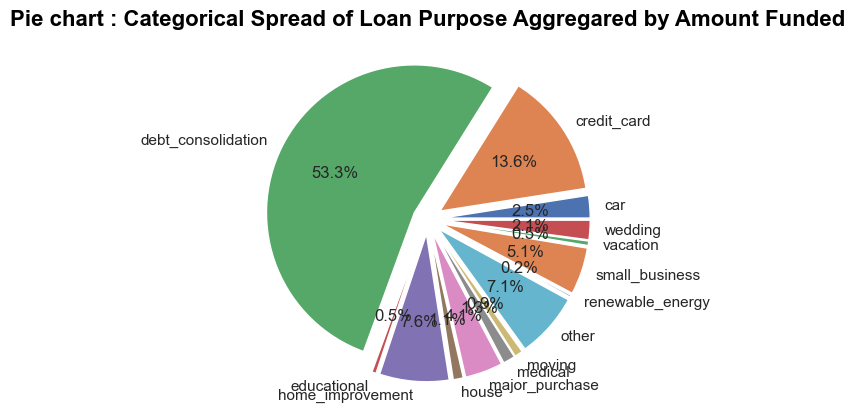

In [1119]:
#undertake categorical analysis of home ownership  and loan purpose vis-a-vis loan_status

# plotting pie chart for different types of purpose
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

loan_purpose_df = loan.groupby('purpose')[['funded_amnt_inv']].sum()
plt.pie(loan_purpose_df['funded_amnt_inv'],labels = loan_purpose_df.index, autopct = '%1.1f%%',explode = explode)

plt.title("Pie chart : Categorical Spread of Loan Purpose Aggregared by Amount Funded",
     color = 'black', fontweight = 'bold', fontsize = '16')
plt.show()

**Observations**:<br>
Majority of people took loan for their debt consolidation

### Analyse the Loan funds across different Purpuse categories

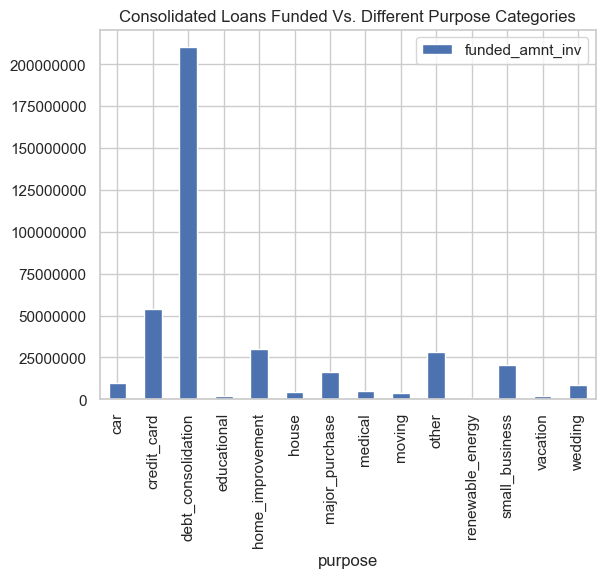

In [1171]:
loan_purpose_df_consolidated = loan.groupby('purpose')[['funded_amnt_inv']].sum()
loan_purpose_df_consolidated.plot(kind="bar", title="Consolidated Loans Funded Vs. Different Purpose Categories")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [1172]:
loan_fully_paid=df[(df['loan_status']==1)]

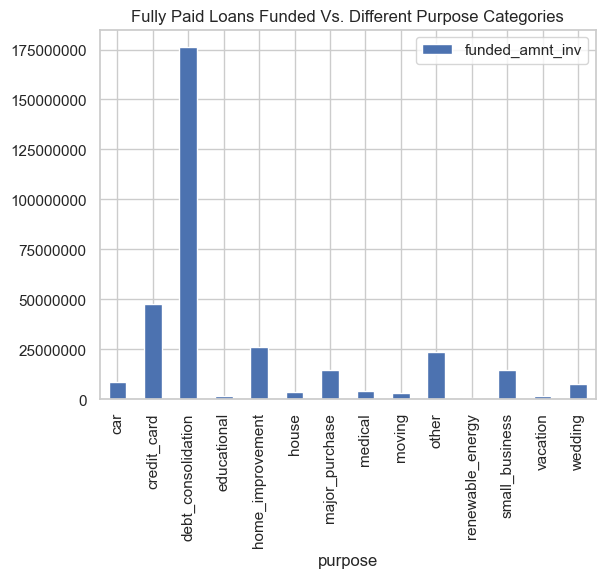

In [1173]:
loan_purpose_df_paidoff = loan_fully_paid.groupby('purpose')[['funded_amnt_inv']].sum()
loan_purpose_df_paidoff.plot(kind="bar", title="Fully Paid Loans Funded Vs. Different Purpose Categories")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [1174]:
loan_charged_off=df[(df['loan_status']==0)]


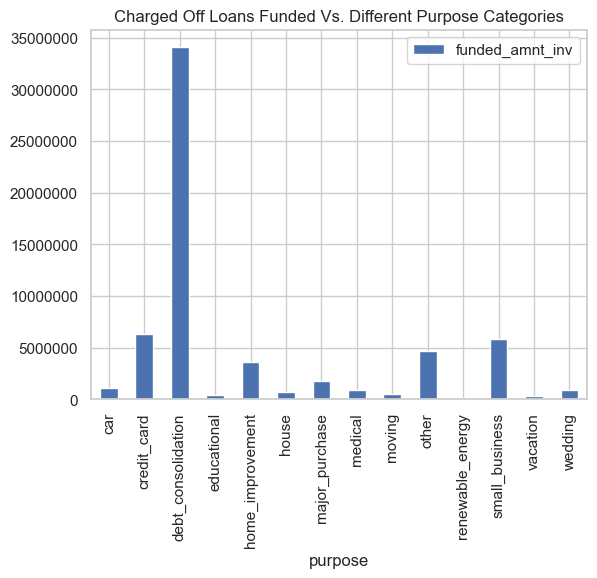

In [1175]:
loan_purpose_df_defaulted = loan_charged_off.groupby('purpose')[['funded_amnt_inv']].sum()
loan_purpose_df_defaulted.plot(kind="bar", title="Charged Off Loans Funded Vs. Different Purpose Categories")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

**Observations**:<br>
Debt consolidation is peak in all three categories of Loan Status

### Consolidated loans Funded Across Different Home ownership

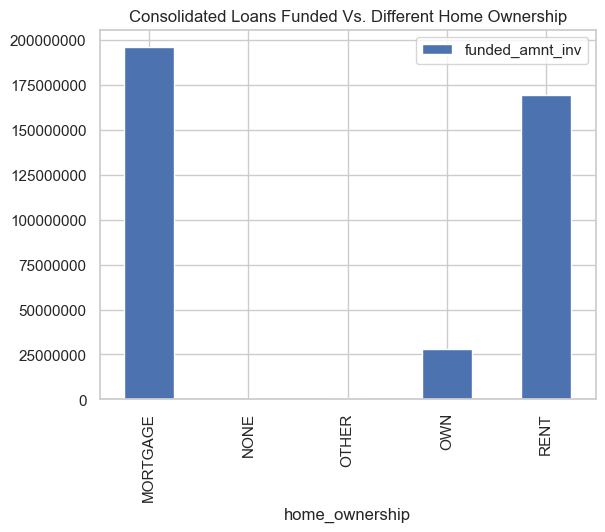

In [1176]:
loan_purpose_df_consolidated = loan.groupby('home_ownership')[['funded_amnt_inv']].sum()
loan_purpose_df_consolidated.plot(kind="bar", title="Consolidated Loans Funded Vs. Different Home Ownership")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

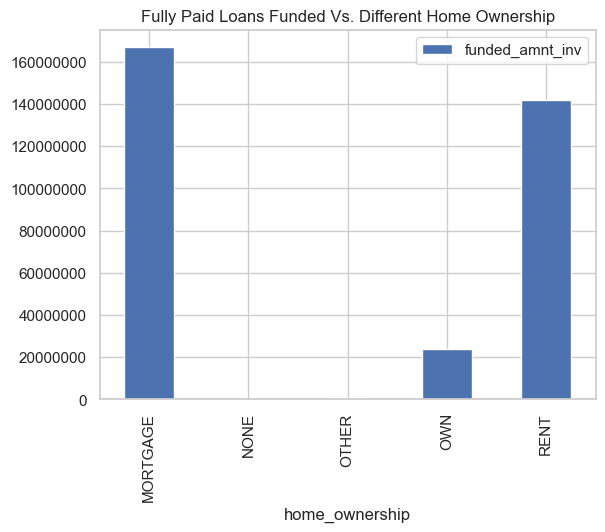

In [1178]:
loan_purpose_df_paidoff = loan_fully_paid.groupby('home_ownership')[['funded_amnt_inv']].sum()
loan_purpose_df_paidoff.plot(kind="bar", title="Fully Paid Loans Funded Vs. Different Home Ownership")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


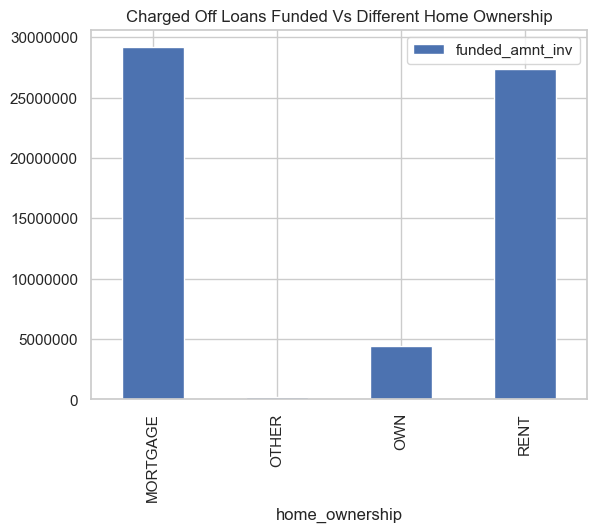

In [1177]:
loan_purpose_df_defaulted = loan_charged_off.groupby('home_ownership')[['funded_amnt_inv']].sum()
loan_purpose_df_defaulted.plot(kind="bar", title="Charged Off Loans Funded Vs Different Home Ownership")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

**Observations**:<br>
Mortgage is peak in all three categories of Loan Status

###  Consolidated loans Funded Across Different Loan Tenure

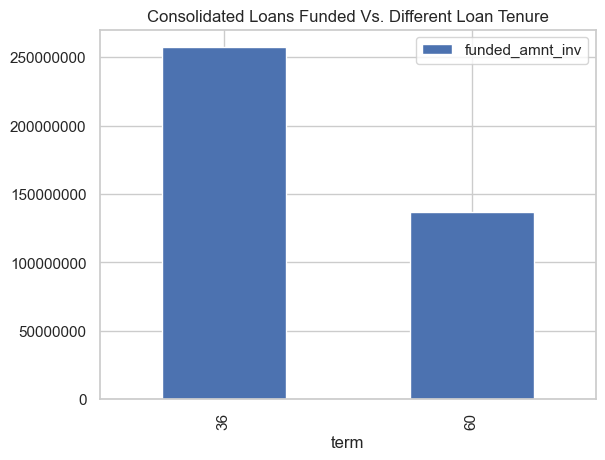

In [1180]:
loan_purpose_df_consolidated = loan.groupby('term')[['funded_amnt_inv']].sum()
loan_purpose_df_consolidated.plot(kind="bar", title="Consolidated Loans Funded Vs. Different Loan Tenure")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

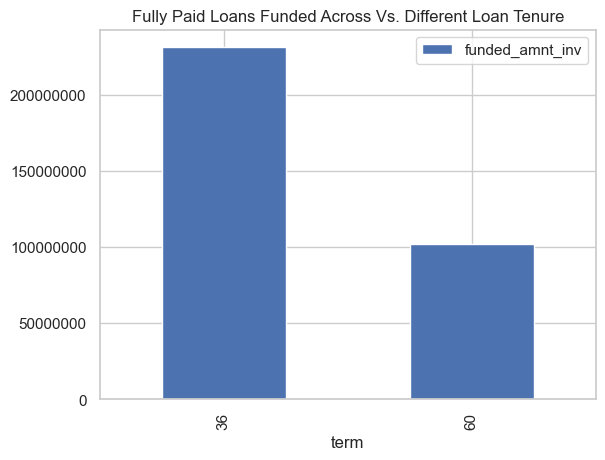

In [1181]:
loan_purpose_df_paidoff = loan_fully_paid.groupby('term')[['funded_amnt_inv']].sum()
loan_purpose_df_paidoff.plot(kind="bar", title="Fully Paid Loans Funded Across Vs. Different Loan Tenure")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

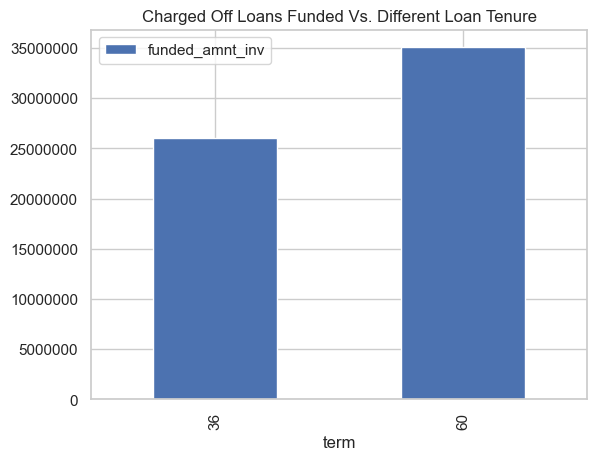

In [1182]:
loan_purpose_df_defaulted = loan_charged_off.groupby('term')[['funded_amnt_inv']].sum()
loan_purpose_df_defaulted.plot(kind="bar", title="Charged Off Loans Funded Vs. Different Loan Tenure")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

**Observations**:<br>
36 Month Loan term is peak in all three categories of Loan Status

### Analyse impact of state and zip code on loan default

loan_status            0            1  %default of total default  %defalt of Loan disbursal
addr_state                                                                                 
NE              0.162499     0.388542                        0.0                       29.0
SD             13.917500    43.285071                        0.0                       24.0
NV            114.309711   364.807239                        2.0                       24.0
AK             19.540407    68.928862                        0.0                       22.0
UT             49.587642   204.655093                        1.0                       20.0
FL            505.771461  2200.431015                        8.0                       19.0
WA            145.313609   664.969282                        2.0                       18.0
NJ            318.082474  1604.969760                        5.0                       17.0
OR             74.327973   351.390048                        1.0                

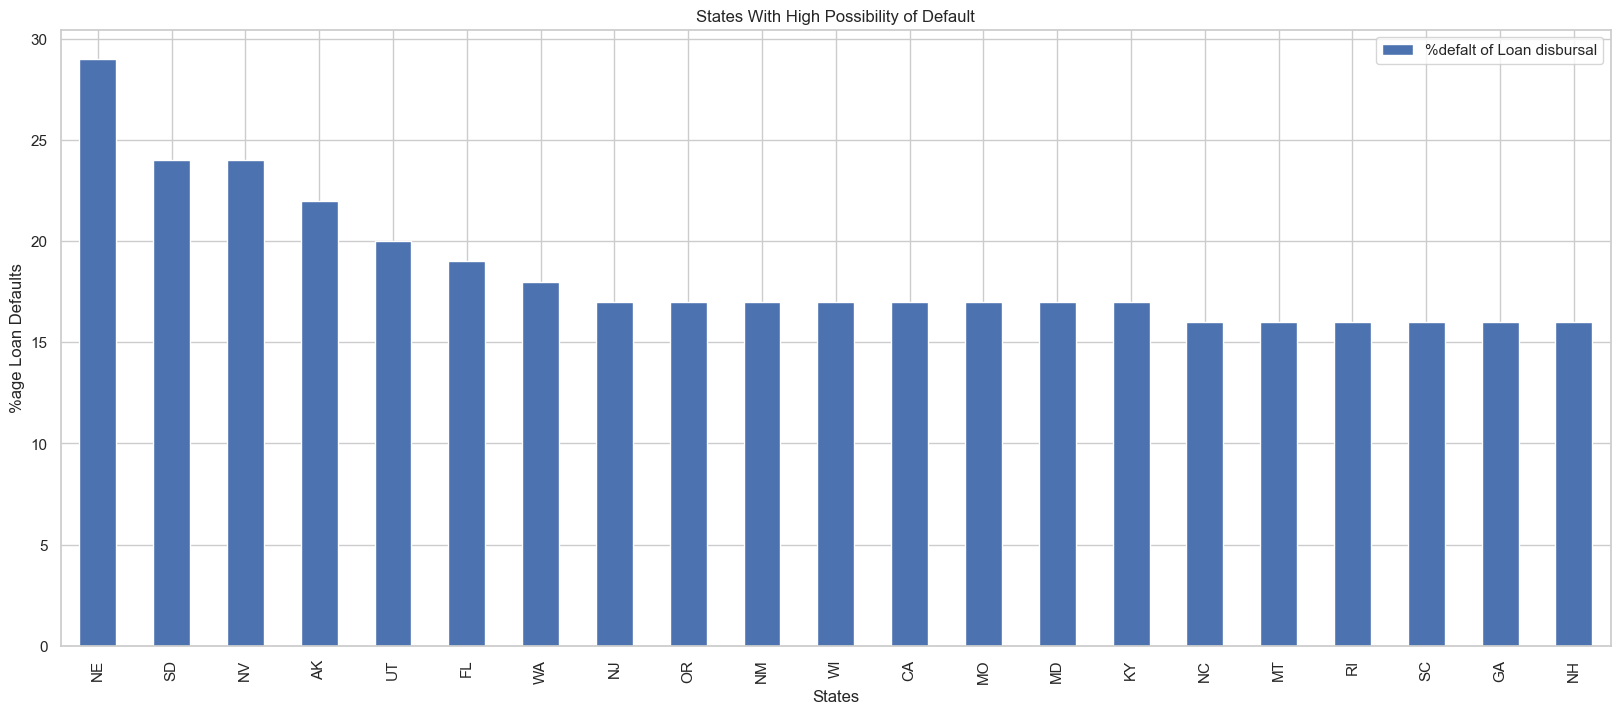

<Figure size 3000x500 with 0 Axes>

In [1131]:
#analyse impact of state on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(df, index='addr_state',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
state_default=raw_table[raw_table["%defalt of Loan disbursal"]>15].sort_values(by='%defalt of Loan disbursal', ascending=False)
print (state_default)
#plot relevant graphs
state_default.plot(kind='bar',figsize=(20,8), ylabel='%age Loan Defaults', xlabel='States', y='%defalt of Loan disbursal')
plt.title("States With High Possibility of Default")
plt.figure(figsize=(30,5))

plt.show()

**Observations**:<br>
There are individuals belonging to a few states that exhibit a higher tendency to default,Stricter vetting of loanees to be considered for Nebraska, South Dakota, Nevada, Alaska etc.

loan_status         0         1  %default of total default  %defalt of Loan disbursal
zip_code                                                                             
438xx        3.161106  1.100000                        0.0                       74.0
746xx        5.297500  1.919300                        0.0                       73.0
496xx        4.095000  1.712500                        0.0                       71.0
673xx        1.200000  0.496058                        0.0                       71.0
561xx        4.509597  1.962500                        0.0                       70.0
203xx        1.575000  0.715000                        0.0                       69.0
608xx        4.677500  2.176444                        0.0                       68.0
215xx        2.200000  1.110000                        0.0                       66.0
371xx        0.960000  0.486209                        0.0                       66.0
668xx        2.500000  1.315000                       

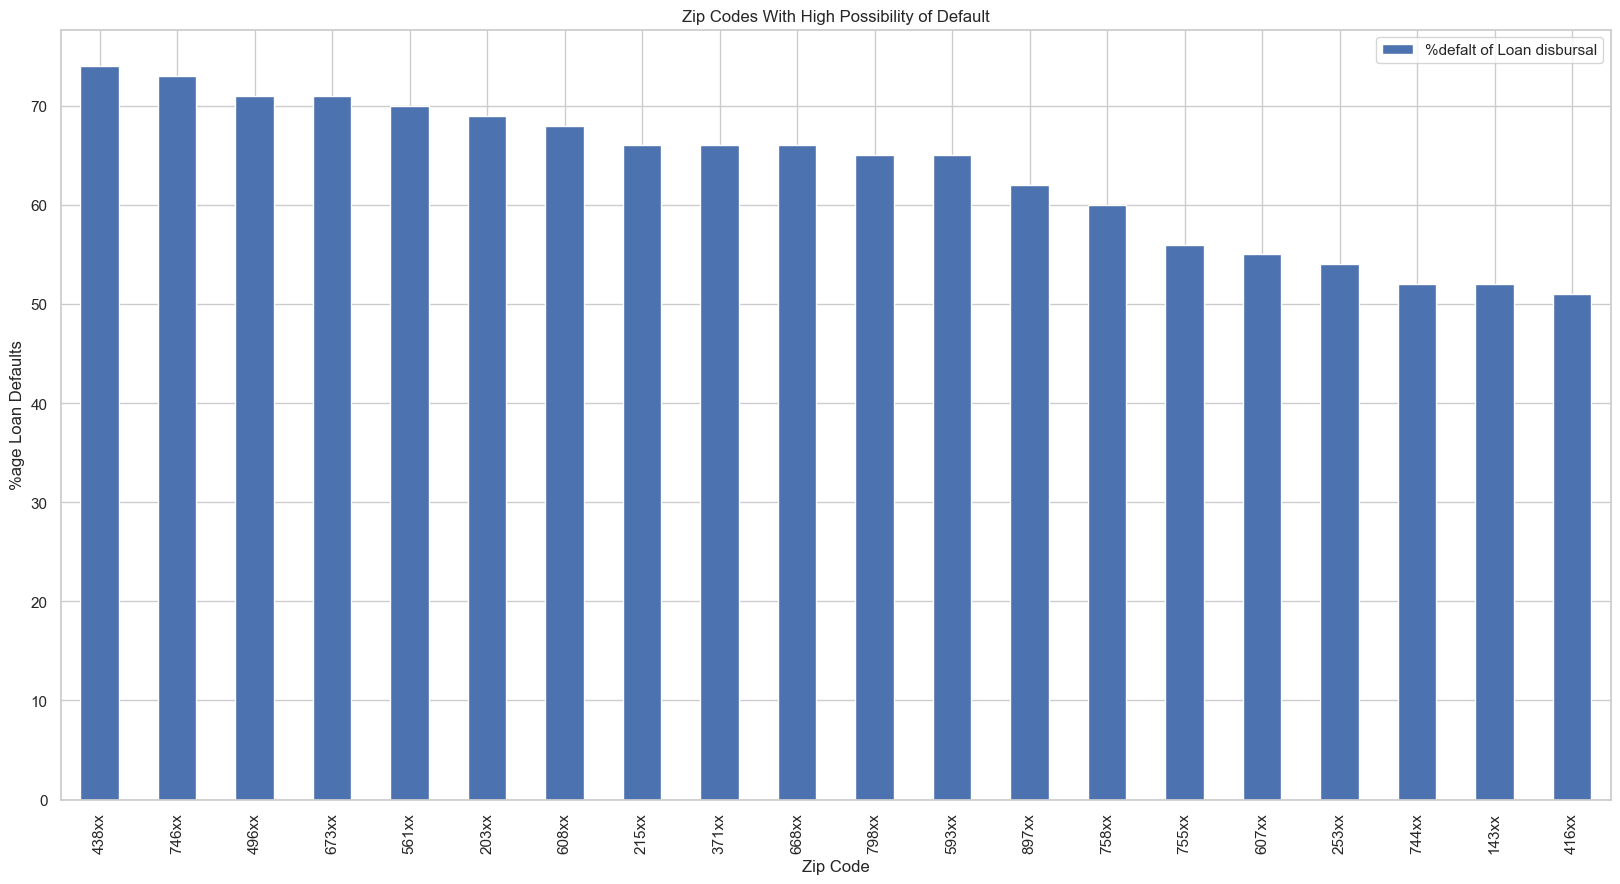

In [1132]:
#analyse impact of zipcode on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(df, index='zip_code',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
zip_default=raw_table[raw_table["%defalt of Loan disbursal"]>50].sort_values(by='%defalt of Loan disbursal', ascending=False)
print (zip_default)
#plot relevant graphs
zip_default.plot(kind='bar',figsize=(20,10), ylabel='%age Loan Defaults', xlabel='Zip Code', y='%defalt of Loan disbursal')
plt.title("Zip Codes With High Possibility of Default")
plt.show()

**Observations**:<br>
There are individuals belonging to a ZIP Codes that exhibit a higher tendency to default,Stricter vetting of loanees to be considered for indicated Zip Codes.

#### Analyse impact of loan purpose on loan default

loan_status                   0             1  %default of total default  %defalt of Loan disbursal
purpose                                                                                            
small_business       585.444310   1444.905545                       10.0                       29.0
educational           36.589579    145.870416                        1.0                       20.0
renewable_energy      14.399654     62.479715                        0.0                       19.0
medical               85.779975    432.055454                        1.0                       17.0
other                463.938806   2344.855589                        8.0                       17.0
debt_consolidation  3408.223495  17613.126275                       56.0                       16.0
house                 70.016359    363.699906                        1.0                       16.0
vacation              29.910826    162.800680                        0.0                       16.0


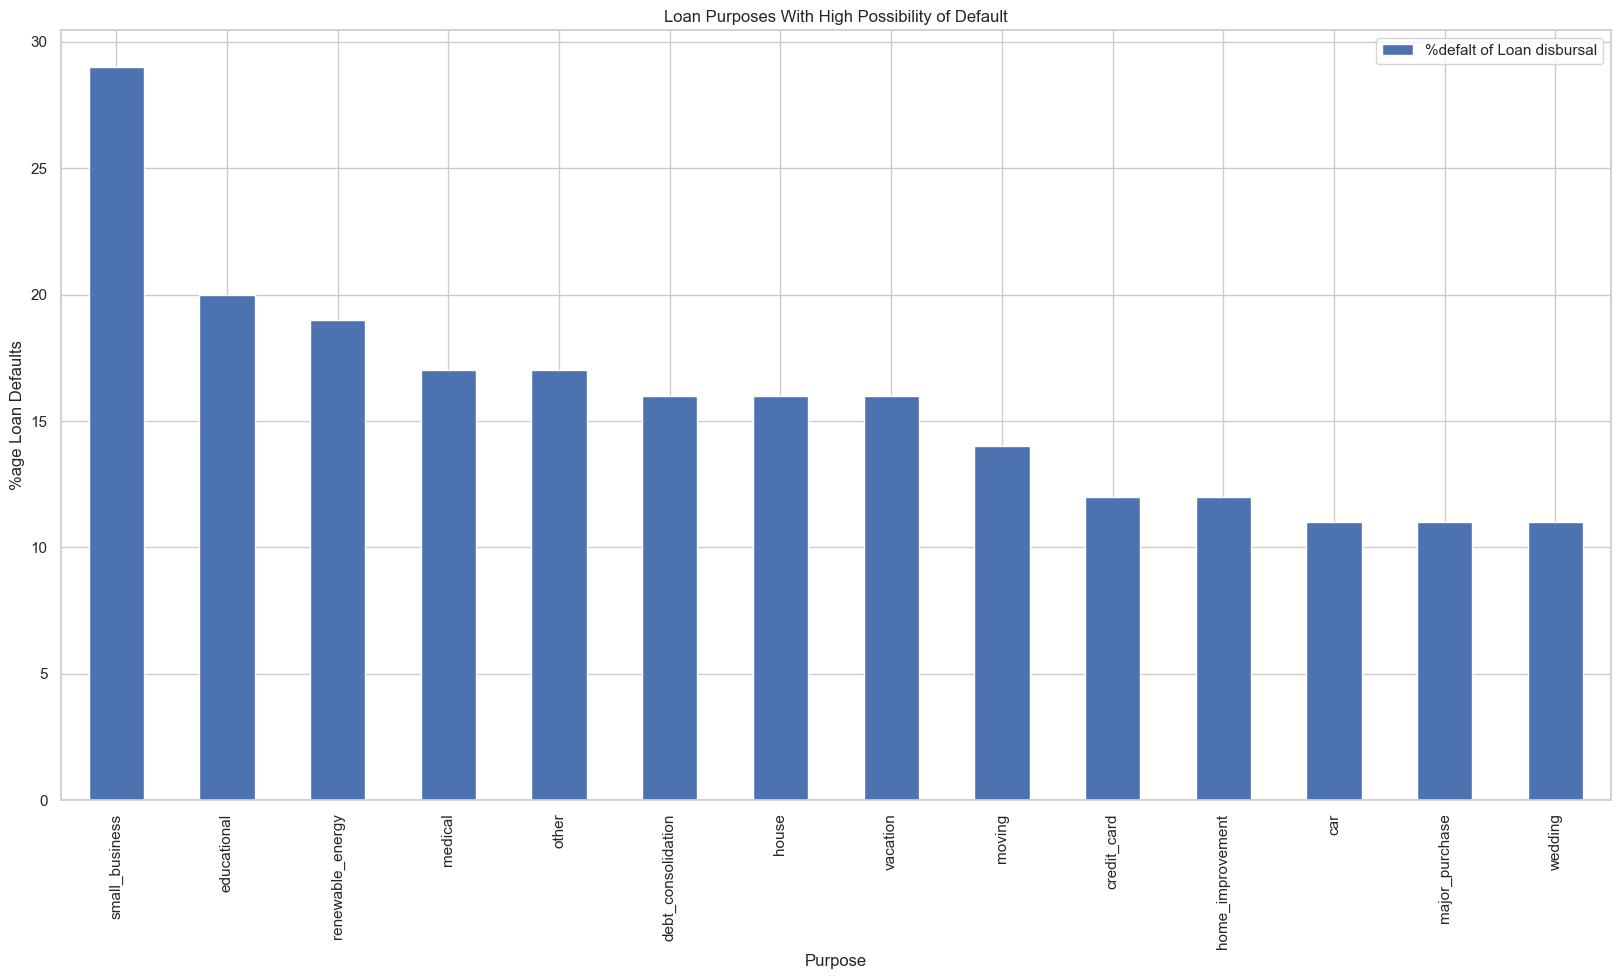

In [1133]:
#analyse impact of purpose on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(df, index='purpose',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
purpose_default=(raw_table.sort_values(by='%defalt of Loan disbursal', ascending=False))
print (purpose_default)
#plot relevant graphs
purpose_default.plot(kind='bar',figsize=(20,10), ylabel='%age Loan Defaults', xlabel='Purpose', y='%defalt of Loan disbursal')
plt.title("Loan Purposes With High Possibility of Default")
plt.show()

**Observations**:<br>
Notwithstanding the value, loans disbursed for small businesses , education and renewable energy have high default percentage amongst its category, Stricter vetting of loanees to be considered for indicated purposes

In [1134]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

#### Analyse impact of verification on loan default

loan_status             0      1  %default of total default  %defalt of Loan disbursal
verification_status                                                                   
Verified             2051  10155                       36.0                       17.0
Source Verified      1434   8243                       25.0                       15.0
Not Verified         2142  14552                       38.0                       13.0


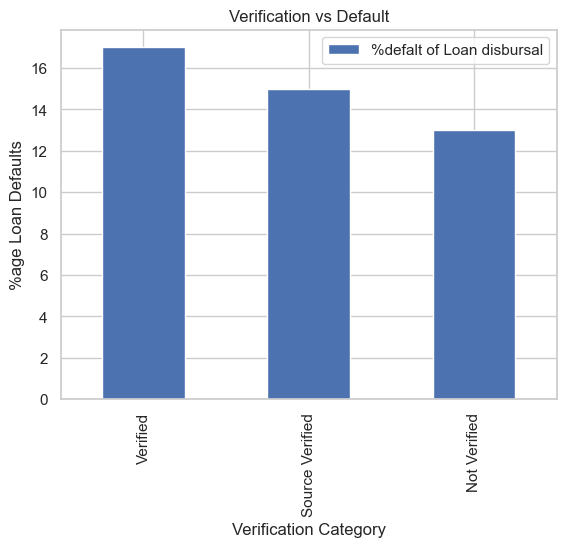

In [1135]:
#analyse impact of verification on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(df, index='verification_status',columns='loan_status',values='funded_amnt_inv',aggfunc='count')
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
verification_default=(raw_table.sort_values(by='%defalt of Loan disbursal', ascending=False))
print (verification_default)
#plot relevant graphs
verification_default.plot(kind='bar', ylabel='%age Loan Defaults', xlabel='Verification Category', y='%defalt of Loan disbursal')
plt.title("Verification vs Default")
plt.show()

**Observations**:<br>
No significant variation observed in default against different verification categories.
Existing venting mechanism appears to be accepted.

#### Analyse impact of loan grade on default

loan_status            0             1  %default of total default  %defalt of Loan disbursal
grade                                                                                       
A             441.974198   7742.303800                        7.0                        5.0
B            1388.838582  10452.996513                       23.0                       12.0
C            1314.487469   6401.156013                       22.0                       17.0
D            1215.562461   4491.693123                       20.0                       21.0
E            1024.339567   2777.616785                       17.0                       27.0
F             558.753605   1062.364411                        9.0                       34.0
G             169.510267    393.668636                        3.0                       30.0


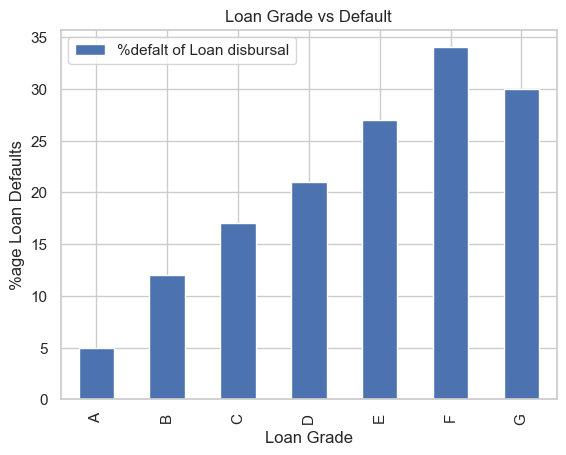

In [1136]:
#analyse impact of loan grade rating on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(df, index='grade',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
loan_grade_default=(raw_table.sort_values(by='grade', ascending=True))
print (loan_grade_default)
#plot relevant graphs
loan_grade_default.plot(kind='bar', ylabel='%age Loan Defaults', xlabel='Loan Grade', y='%defalt of Loan disbursal')
plt.title("Loan Grade vs Default")
plt.show()

**Observations**:<br>
There is a direct correlation between degreasing grade of loan and increasing incidents of defaults
Existing loan grading mechanism appears to be working satisfactorily.

loan_status           0            1  %default of total default  %defalt of Loan disbursal
sub_grade                                                                                 
F5           103.962321   106.589469                        2.0                       49.0
F4            96.992345   148.889053                        2.0                       39.0
G3            32.608680    52.444542                        1.0                       38.0
G5            16.637432    36.076576                        0.0                       32.0
F1           162.578799   339.602457                        3.0                       32.0
G2            46.062962   100.716229                        1.0                       31.0
G1            54.581942   121.754863                        1.0                       31.0
F2           111.051688   260.558081                        2.0                       30.0
F3            84.168451   206.725351                        1.0                       29.0

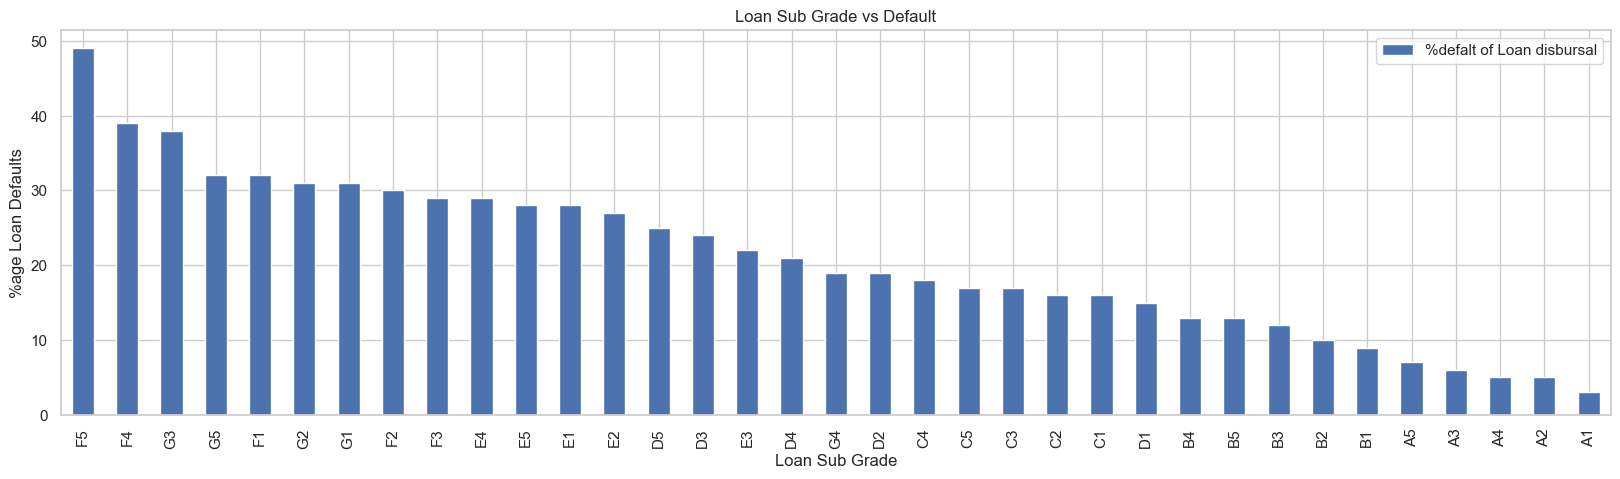

In [1137]:
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(df, index=['sub_grade'],columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
loan_sub_grade_default=(raw_table.sort_values(by='%defalt of Loan disbursal', ascending=False))

print (loan_sub_grade_default)
#plot relevant graphs
loan_sub_grade_default.plot(kind='bar', ylabel='%age Loan Defaults',figsize=(20,5), xlabel='Loan Sub Grade', y='%defalt of Loan disbursal')
plt.title("Loan Sub Grade vs Default")

plt.show()

**Observations**:<br>
There is a direct correlation between degreasing sub grade of loan and increasing incidents of defaults
Existing loan grading mechanism appears to be working satisfactorily.
However, loans classified with sub grade F4, F5 and G3 required careful scrutiny

#### Analyse impact of employment tenure on default

loan_status            0            1  %default of total default  %defalt of Loan disbursal
emp_length                                                                                 
nan           191.463485   646.708744                        3.0                       23.0
10           1760.297043  8365.373798                       29.0                       17.0
7             312.436364  1551.215145                        5.0                       17.0
0             571.965440  3312.162201                        9.0                       15.0
3             577.530230  3366.339706                        9.0                       15.0
5             507.884734  2825.525137                        8.0                       15.0
6             343.863582  1957.058736                        6.0                       15.0
8             236.718875  1323.043183                        4.0                       15.0
1             400.691554  2434.170747                        7.0                

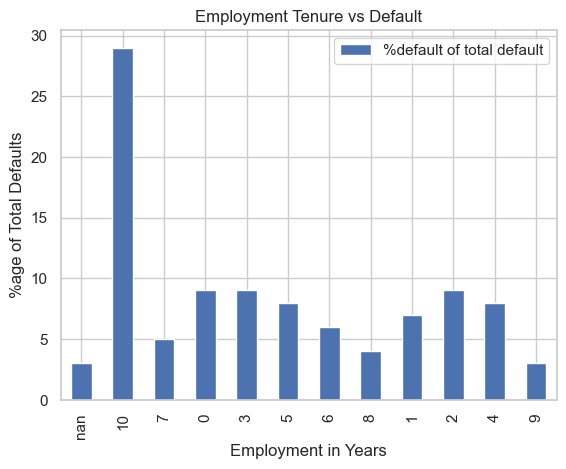

In [1183]:
#analyse impact of employment tenure on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(df, index='emp_length',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
emply_default=(raw_table.sort_values(by='%defalt of Loan disbursal', ascending=False))

print (emply_default)
#plot relevant graphs
emply_default.plot(kind='bar', ylabel='%age of Total Defaults', xlabel='Employment in Years', y='%default of total default')
plt.title("Employment Tenure vs Default")
plt.show()

**Observations**:<br>
It is observed that people having employment tenures longer than 10 years are likely to default more.
Greater scrutiny recommended for loanees having employment more than 10 years.

#### Undertake binning of data for sets with too much diversity

In [1139]:
#undertake binning for loan amount
df.funded_amnt_inv.describe()
bin_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000','20000-25000', '25000-30000','30000-35000']
bins = [-1, 5000, 10000, 15000, 20000,25000,30000,35000]
df['funded_amnt_inv_binned'] = pd.cut(loan['funded_amnt_inv'], bins=bins, labels=bin_labels)


In [1140]:
#undertake binning for interest rate
df.int_rate.describe()
bin_labels = ['0-5', '5-10', '10-15', '15-20','20-25', '25-30']
bins = [0, 5, 10, 15, 20, 25, 30]
df['int_rate_binned'] = pd.cut(loan['int_rate'], bins=bins, labels=bin_labels)

In [1141]:
#undertake binning for annual income
df.annual_inc.describe()
bin_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K','100K-500K', '500K-1M','1M+']
bins = [0, 25000, 50000, 75000, 100000,500000,1000000,10000000]
df['annual_inc_binned'] = pd.cut(loan['annual_inc'], bins=bins, labels=bin_labels)

In [1142]:
#undertake binning for debt to income ratio
df.dti.describe()
bin_labels = ['0-5', '5-10', '10-15', '15-20','20-25', '25-30']
bins = [-1, 5, 10, 15, 20, 25, 30]
df['dti_binned'] = pd.cut(loan['dti'], bins=bins, labels=bin_labels)

In [1143]:
df.revol_bal.describe()
#undertake binning for revolviong balance ratio
df.revol_bal.describe()
bin_labels = ['0-25K', '25K-50K','50K-75K', '75K-100K', '100K-125K', '125K-150K', '150K+']
bins = [-1, 25000, 50000, 75000, 100000, 125000, 150000, 175000]
df['revol_bal_binned'] = pd.cut(loan['revol_bal'], bins=bins, labels=bin_labels)


In [1144]:
#undertake binning for issue_d month
bin_labels = ['Q1', 'Q2','Q3', 'Q4']
bins = [0, 1, 4, 8, 12]
df['issue_d_month_binned'] = pd.cut(loan['issue_d_month'], bins=bins, labels=bin_labels)


<AxesSubplot:xlabel='Annual Income', ylabel='No of Funded Investments'>

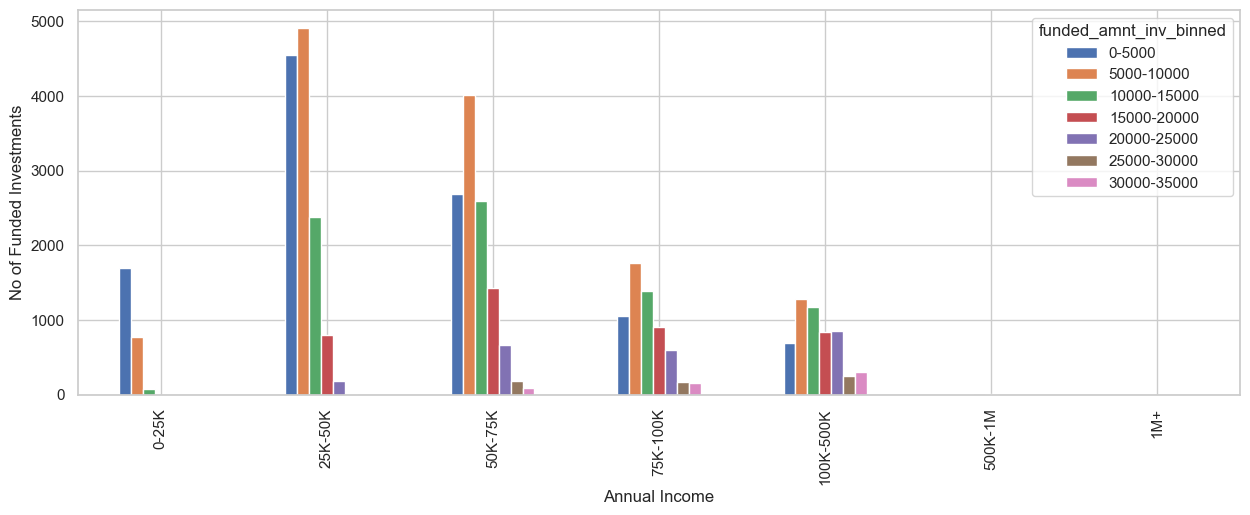

In [1146]:
#analyse impact of annual income on funded loan amount
raw_table=pd.pivot_table(df, index='funded_amnt_inv_binned',columns='annual_inc_binned',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar',figsize=(15,5), ylabel='No of Funded Investments', xlabel='Annual Income')


<AxesSubplot:xlabel='Annual Income', ylabel='No of Funded Investments'>

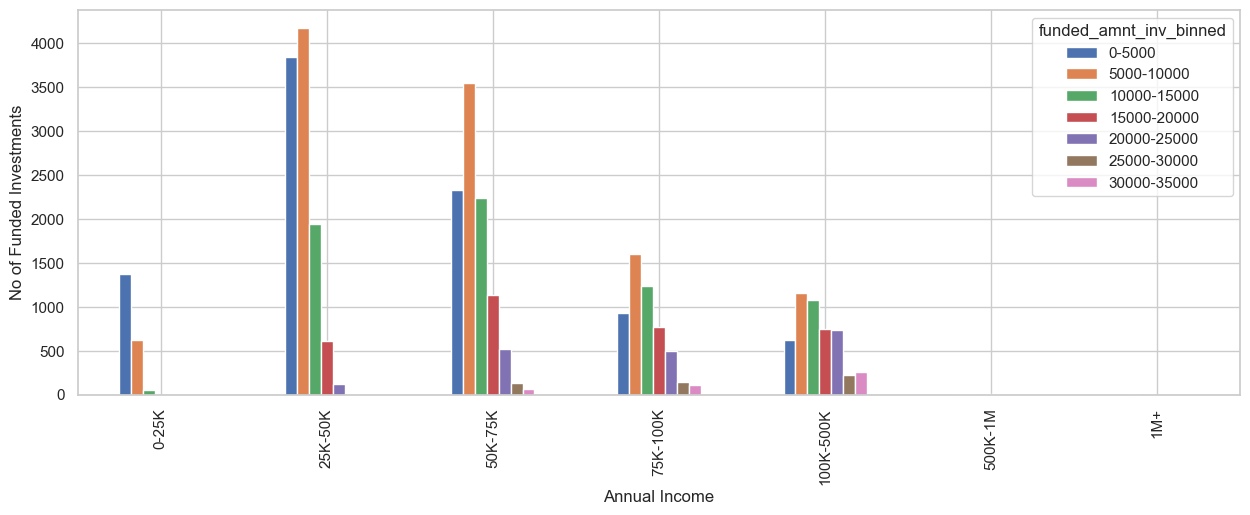

In [1147]:
loan_defaulted=df[df.loan_status == 1]
raw_table=pd.pivot_table(loan_defaulted, index='funded_amnt_inv_binned',columns='annual_inc_binned',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar',figsize=(15,5), ylabel='No of Funded Investments', xlabel='Annual Income')

<AxesSubplot:xlabel='Annual Income', ylabel='No of Funded Investments'>

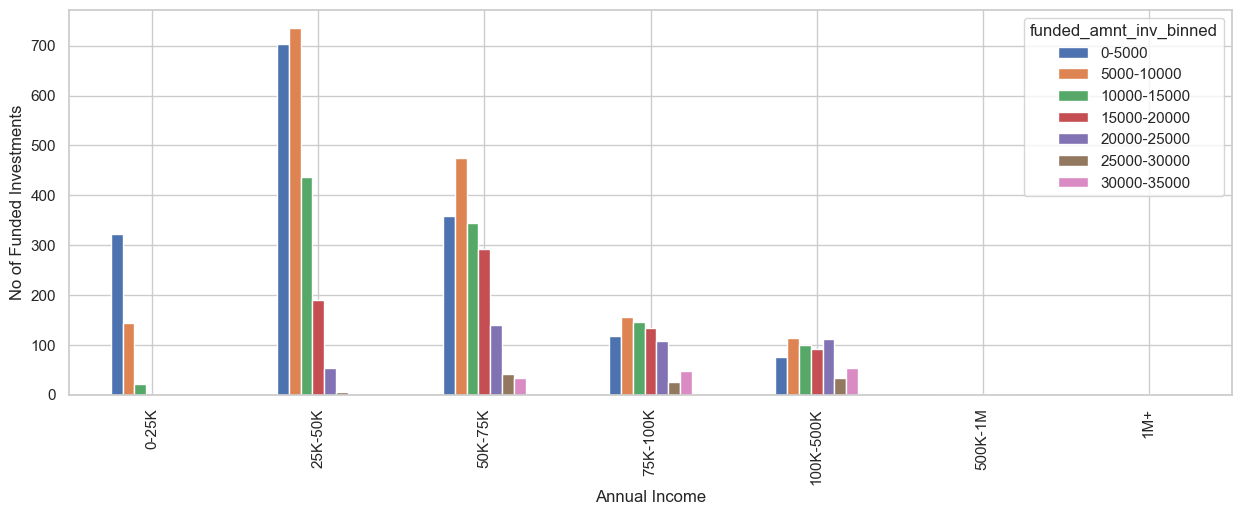

In [1148]:
loan_defaulted=df[df.loan_status == 0]
raw_table=pd.pivot_table(loan_defaulted, index='funded_amnt_inv_binned',columns='annual_inc_binned',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar',figsize=(15,5), ylabel='No of Funded Investments', xlabel='Annual Income')

In [1149]:
df['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

<AxesSubplot:xlabel='Debt-Income Ratio', ylabel='Intrest Rate'>

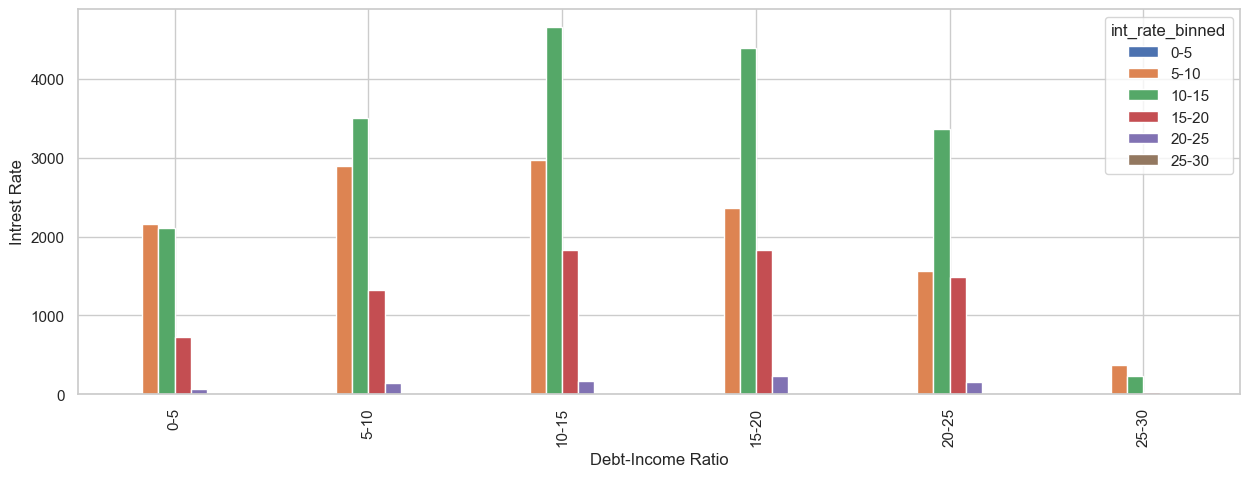

In [1150]:
#undertake assessment of relationship between dti and intrest rate
raw_table=pd.pivot_table(df, index='int_rate_binned',columns='dti_binned',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar',figsize=(15,5), ylabel='Intrest Rate', xlabel='Debt-Income Ratio')


**Observations**:<br>
It is observed that people having employment tenures longer than 10 years are likely to default more
Greater scrutiny recommended for loanees having employment more than 10 years.

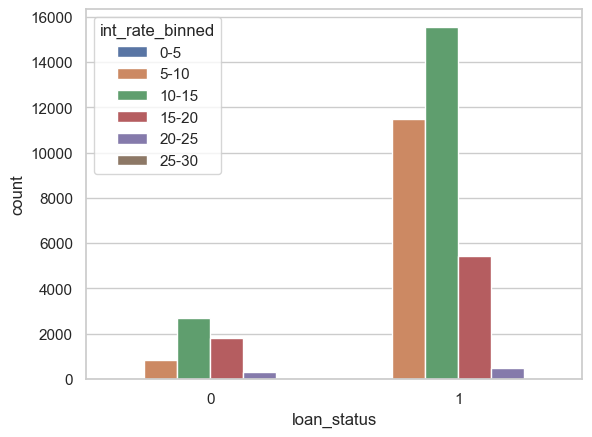

In [1151]:
# count plot on two categorical variable
sns.countplot(x ='loan_status', hue = "int_rate_binned", data = df)
 # Show the plot
plt.show()

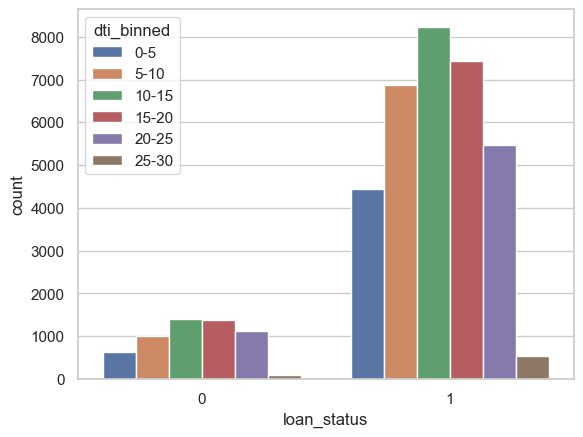

In [1152]:
# count plot on two categorical variable
sns.countplot(x ='loan_status', hue = "dti_binned", data = df)
 # Show the plot
plt.show()

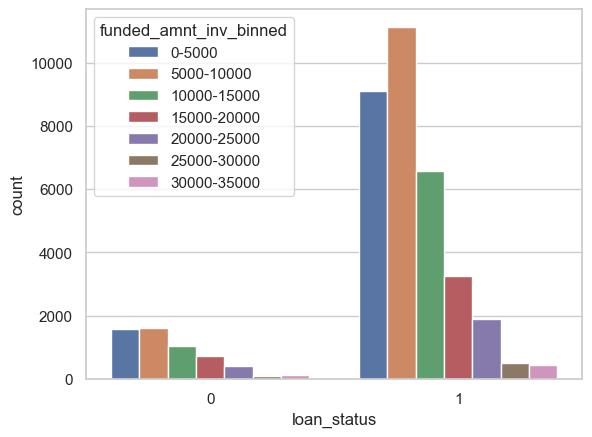

In [1153]:
# count plot on two categorical variable
sns.countplot(x ='loan_status', hue = "funded_amnt_inv_binned", data = df)
 # Show the plot
plt.show()

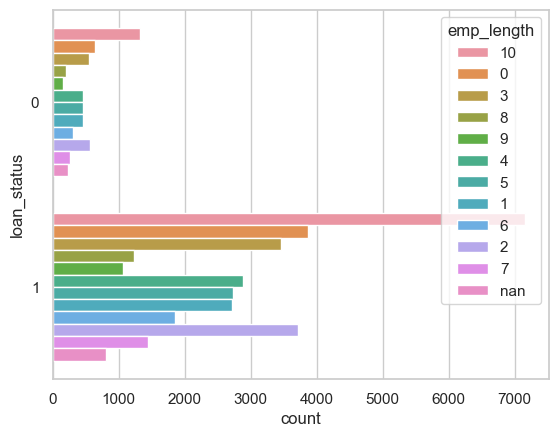

In [1154]:
# count plot on two categorical variable
sns.countplot(y ='loan_status', hue = "emp_length", data = df)
 # Show the plot
plt.show()

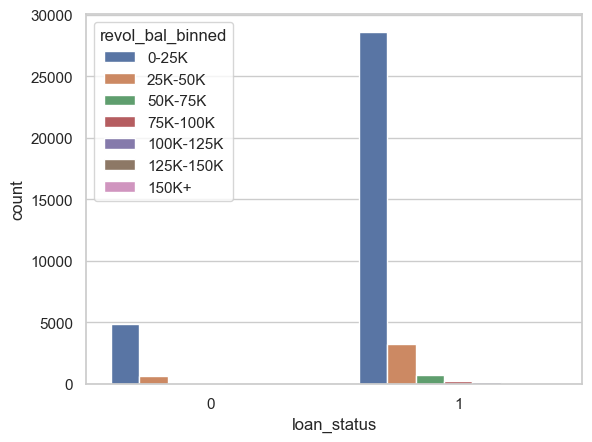

In [1155]:
# count plot on two categorical variable
sns.countplot(x ='loan_status', hue = "revol_bal_binned", data = df)
 # Show the plot
plt.show()

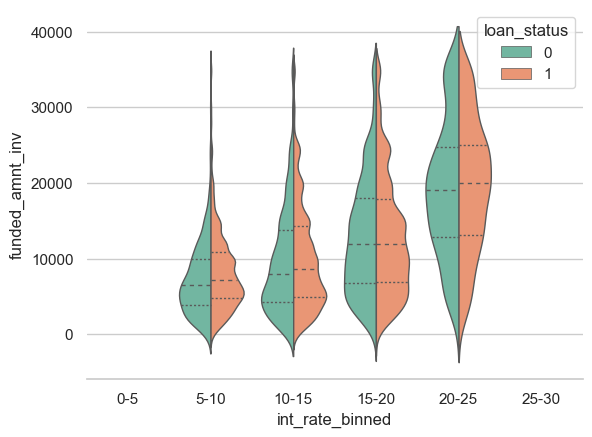

In [1156]:
sns.set_theme(style="whitegrid")
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="int_rate_binned", y="funded_amnt_inv", hue="loan_status",
               split=True, inner="quart", linewidth=1,
               palette="Set2")
sns.despine(left=True)

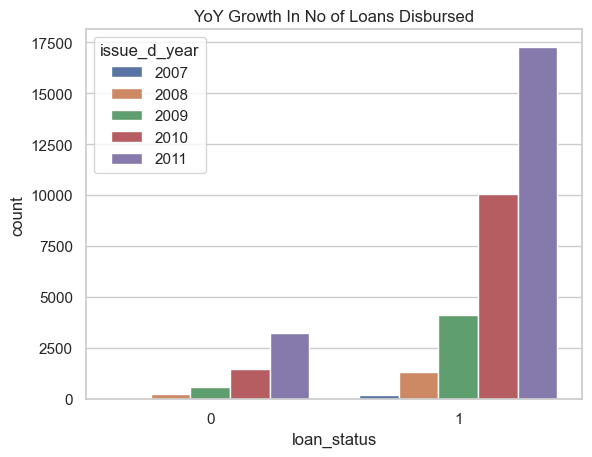

In [1157]:
# Pattern of loan disbursement
sns.countplot(x ='loan_status', hue = "issue_d_year", data = df)
plt.title("YoY Growth In No of Loans Disbursed")

 # Show the plot
plt.show()

**Observations**:<br>
There has been a steep increase in number of loan disbursals.

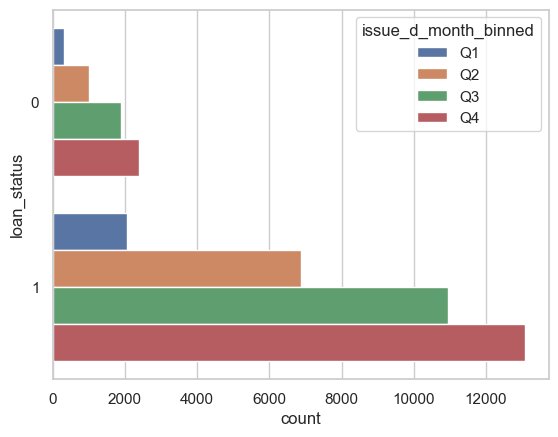

<Figure size 10000x800 with 0 Axes>

In [1158]:
# count plot on two categorical variable
sns.countplot(y ='loan_status', hue = "issue_d_month_binned", data = df)
plt.figure(figsize=(100,8))

 # Show the plot
plt.show()

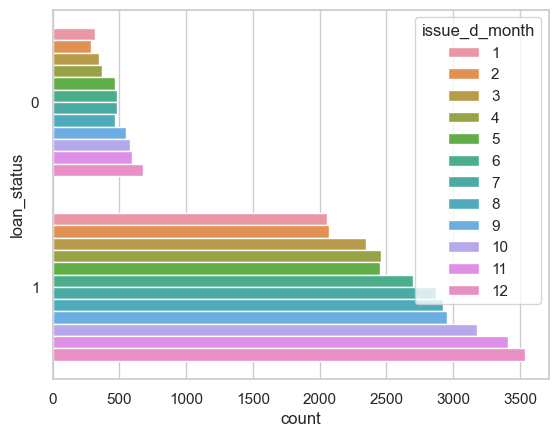

<Figure size 10000x800 with 0 Axes>

In [1159]:
# count plot on two categorical variable
sns.countplot(y ='loan_status', hue = "issue_d_month", data = df)
plt.figure(figsize=(100,8))
# Show the plot
plt.show()

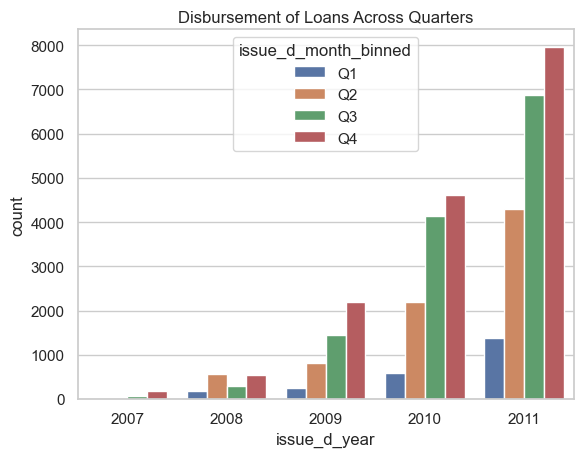

In [1160]:
# Pattern of Loan Disbursement
sns.countplot(x ='issue_d_year', hue = "issue_d_month_binned", data = df)
plt.title("Disbursement of Loans Across Quarters")
# Show the plot
plt.show()

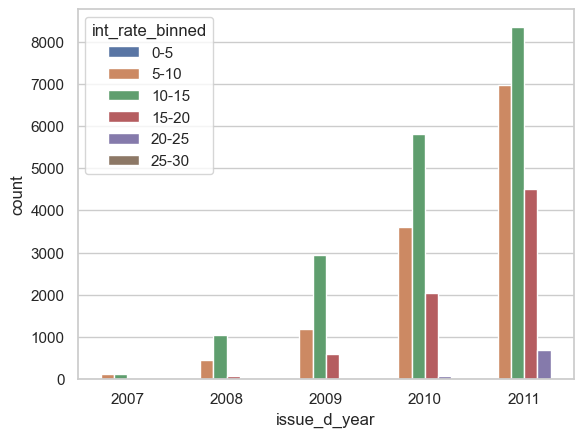

<Figure size 10000x2000 with 0 Axes>

In [1161]:
# count plot on two categorical variable
sns.countplot(x ='issue_d_year', hue = "int_rate_binned", data = df)
plt.figure(figsize=(100,20))
# Show the plot
plt.show()

**Observations**:<br>
Disbursement of loans increases towards end of financial year.

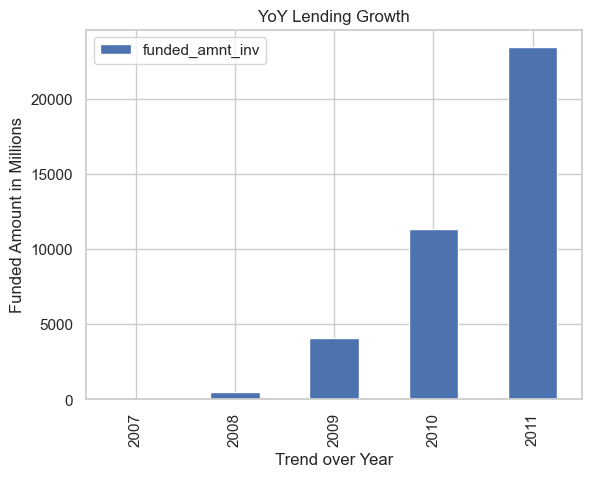

In [1162]:
#find YoY lending pattern of Lending club
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(df, index='issue_d_year',values='funded_amnt_inv',aggfunc=func)
raw_table.plot(kind='bar', ylabel='Funded Amount in Millions', xlabel='Trend over Year')
plt.title("YoY Lending Growth")
plt.show()

**Observations**:<br>
There has been a steep increase in amount of money lended by LC since 2007

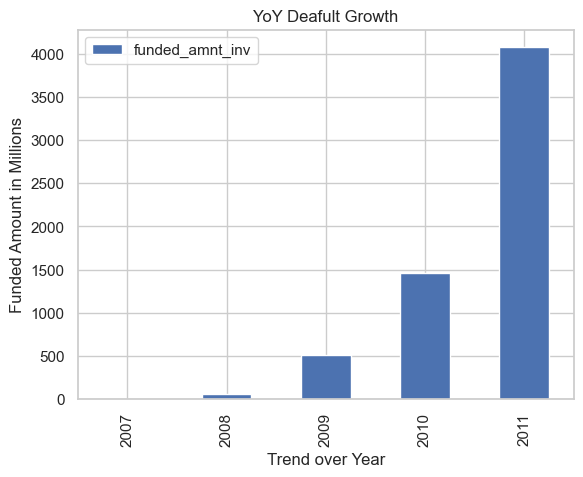

In [1163]:
#find YoY defaulting pattern of Lending club
func=lambda x : np.sum(x)/10000
loan_charged_off=df[(df.loan_status==0)]
raw_table=pd.pivot_table(loan_charged_off, index='issue_d_year',values='funded_amnt_inv',aggfunc=func)
raw_table.plot(kind='bar', ylabel='Funded Amount in Millions', xlabel='Trend over Year')
plt.title("YoY Deafult Growth")
plt.show()

**Observations**:<br>
There has also been a corresponding increase in the amount of default

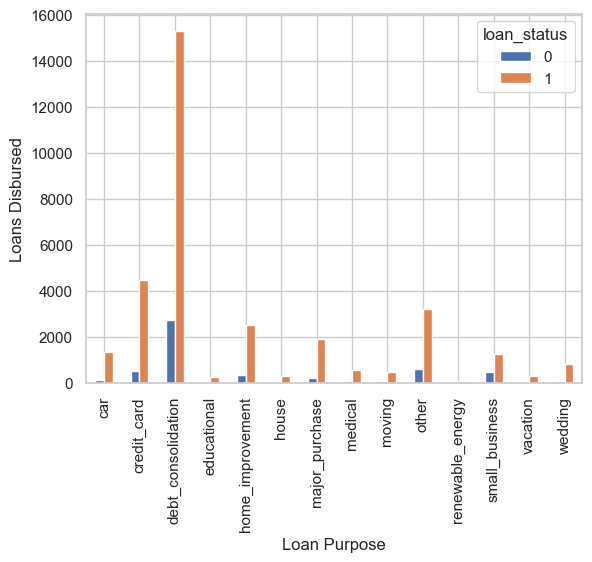

In [1164]:
#undertake assessment of relationship between purpose and loan default
raw_table=pd.pivot_table(df, index='purpose',columns='loan_status',values='funded_amnt_inv',aggfunc='count')
raw_table.plot(kind='bar', ylabel='Loans Disbursed', xlabel='Loan Purpose')
plt.show()

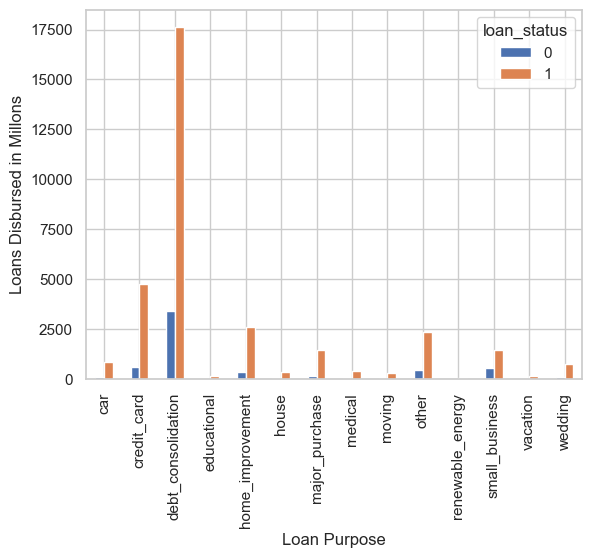

In [1165]:
#undertake assessment of relationship between purpose and loan default by value
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(df, index='purpose',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table.plot(kind='bar', ylabel='Loans Disbursed in Millons', xlabel='Loan Purpose')
plt.show()

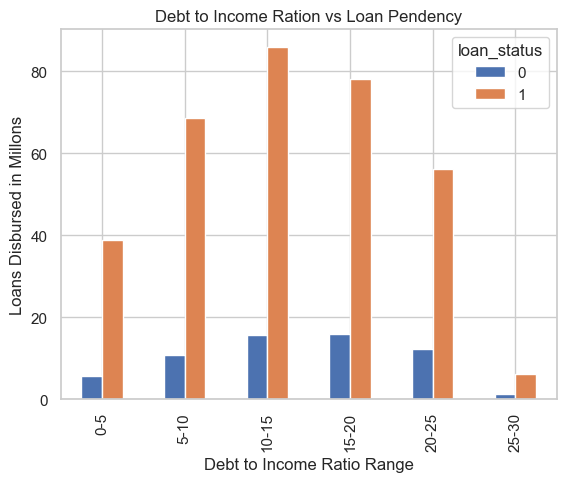

In [1166]:
#undertake assessment of relationship between purevol_balrpose and loan default by value
func=lambda x : np.sum(x)/1000000
raw_table=pd.pivot_table(df, index='dti_binned',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table.plot(kind='bar', ylabel='Loans Disbursed in Millons', xlabel='Debt to Income Ratio Range')
plt.title("Debt to Income Ration vs Loan Pendency")
plt.show()

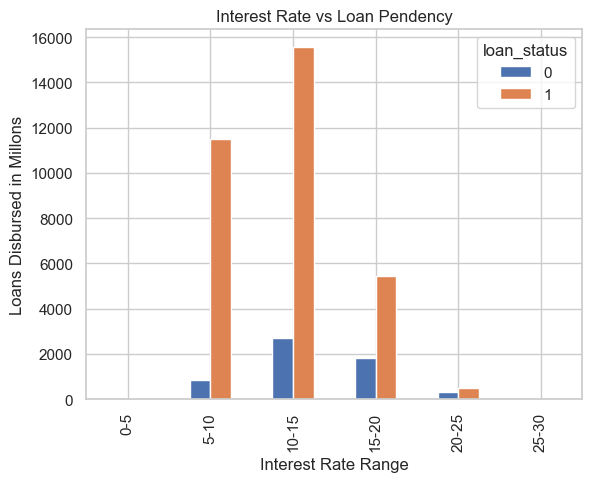

In [1167]:
#undertake assessment of relationship between intrest rate and loan default by value
func=lambda x : np.sum(x)/1000000
raw_table=pd.pivot_table(df, index='int_rate_binned',columns='loan_status',values='funded_amnt_inv',aggfunc='count')
raw_table.plot(kind='bar', ylabel='Loans Disbursed in Millons', xlabel='Interest Rate Range')
plt.title("Interest Rate vs Loan Pendency")
plt.show()

**Observations**:<br>
It is observed that chances of default in middle interest rate region is highest.
Lending Club may consider flexible interest rate in case loan appears to default

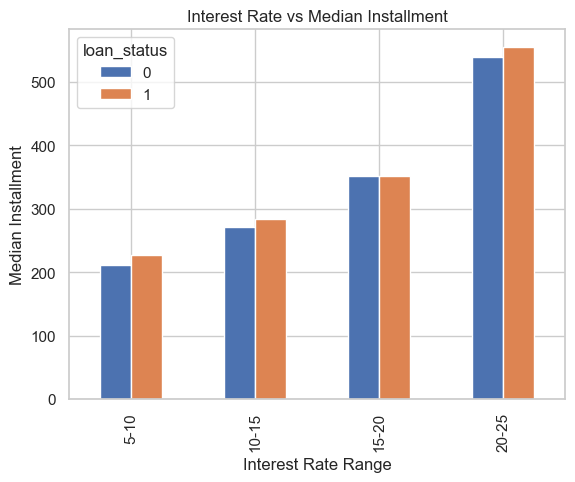

In [1168]:
#undertake assessment of relationship between intrest rate and EMI by value
func=lambda x : np.sum(x)/1000000
raw_table=pd.pivot_table(df, index='int_rate_binned',columns='loan_status',values='installment',aggfunc=np.median)
raw_table.plot(kind='bar', ylabel='Median Installment', xlabel='Interest Rate Range')
plt.title("Interest Rate vs Median Installment")
plt.show()

**Observations**:<br>
There is a direct correlation between interest rate and median installment for loan
Investors may consider creating another interest bracket below 20% as there is a significant jump in default beyond the same

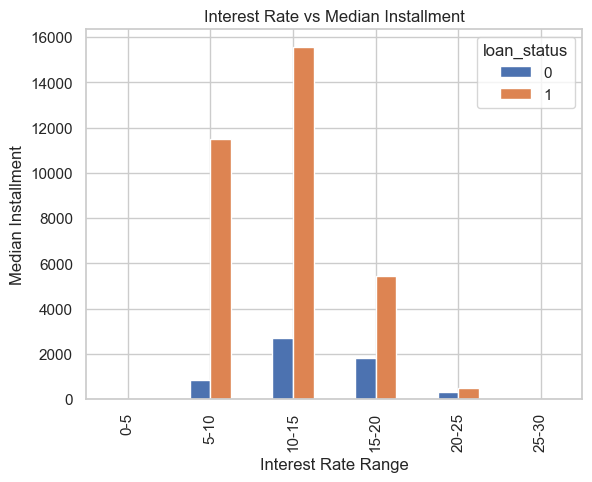

In [1169]:
#undertake assessment of relationship between intrest rate and EMI by value
func=lambda x : np.sum(x)/1000000
raw_table=pd.pivot_table(df, index='int_rate_binned',columns='loan_status',values='installment',aggfunc='count')
raw_table.plot(kind='bar', ylabel='Median Installment', xlabel='Interest Rate Range')
plt.title("Interest Rate vs Median Installment")
plt.show()

### Undertake Multivariate Analysis

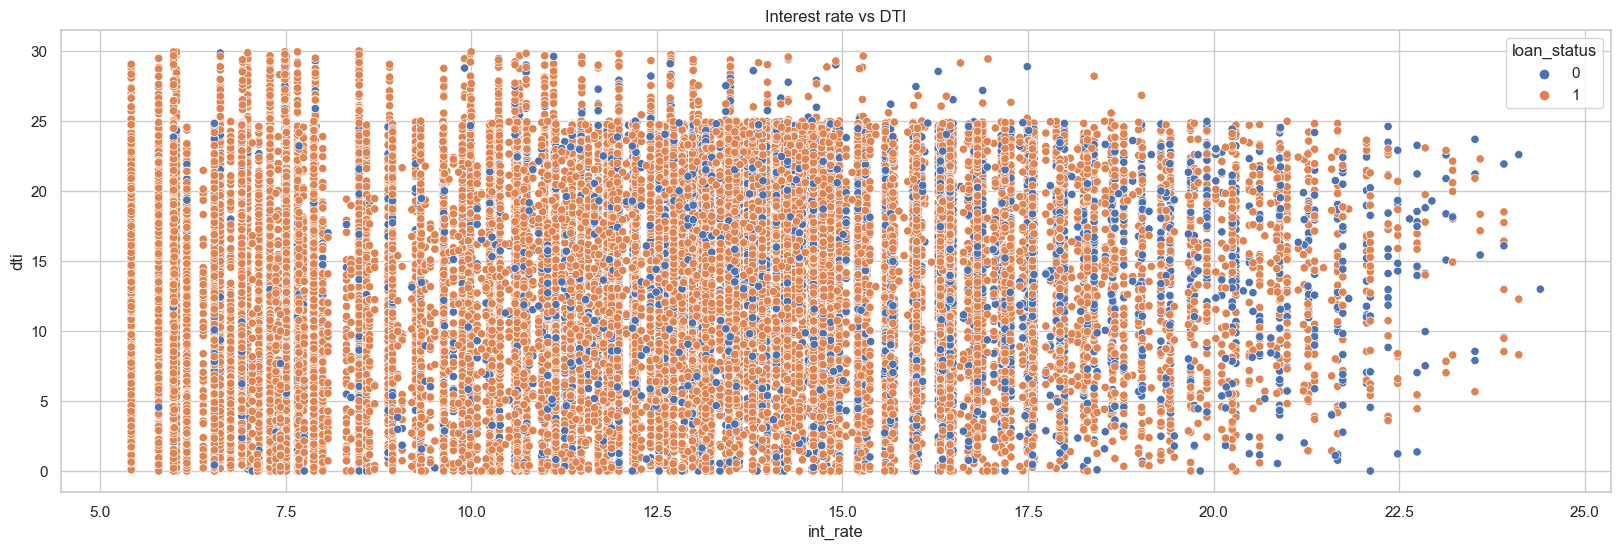

In [1170]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=df, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

**Observations**  
Values are spread all accross, but we can see one thing here irrespective of DTI when interest rates are high charged off loans are high.

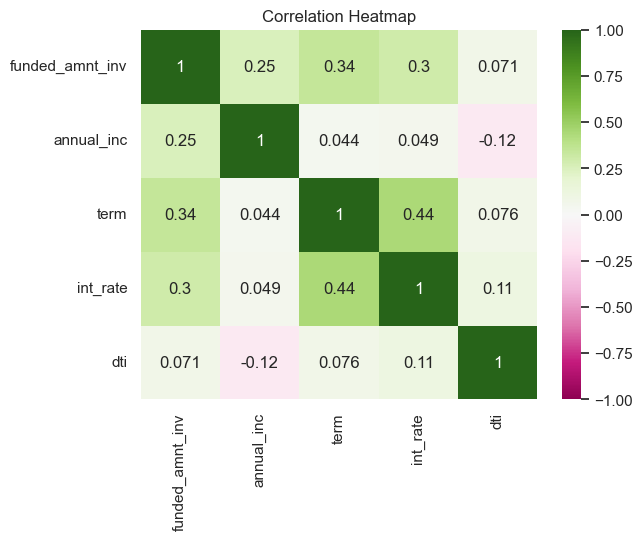

In [1082]:
#based on analysis above and factors found to be affecting undertake multivariate analysis
# plot heat map to see correlation between features
columns_of_interest = ["funded_amnt_inv", "annual_inc", "term", "int_rate", "purpose", "addr_state", "zip_code", "dti", 'loan_status']
loan_corr = df[columns_of_interest].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="PiYG")
plt.title("Correlation Heatmap")
plt.show()

**Observations**  
There is a positive correlation between some entities and a negative correlation between some. Chances of default are strongly correlated with term and interest rate

**Recommendations**:<br>
<br>
**Customer Demographics**:Customer demographics are a good indicator of ability of customer to pay loans.<br>
**Credit Verification**:Existing schemes to grade loans and customer verification seem to be satisfactory.<br>
**Loan Metrics**:Lower interest rates coupled with short term and easy EMI decrease the chances of default.<br>
**Loan Disbursal**:Investors may closely scrutinise high value-high interest rate loans.